# 线性回归预测大学申请成功率

## 一、导入工具包

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression,Lasso,Ridge

## 二、加载数据

In [2]:
data = pd.read_csv('../data/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Serial No.	列无意义，删掉

In [3]:
data.drop('Serial No.',axis=1,inplace=True)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## 三、数据预处理

### 3.1 异常值处理

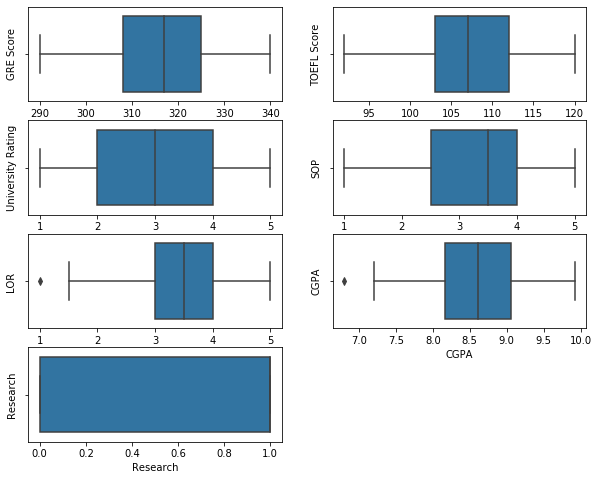

In [5]:
figure = plt.figure(figsize=(10,8))

for i, col in enumerate(data.iloc[:,:-1].columns):
    figure.add_subplot(4,2,i+1)
    sns.boxplot(data[col])
    plt.ylabel(col)
    
plt.show()

### 3.2 缺失值处理

In [6]:
missingDf = data.isnull().sum().sort_values(ascending=False).reset_index()
missingDf.columns = ['feature','missing_num']
missingDf['missing_percentage'] = missingDf['missing_num'] / data.shape[0]
missingDf.head()

,feature,missing_num,missing_percentage
0,Chance of Admit,0,0.0
1,Research,0,0.0
2,CGPA,0,0.0
3,LOR,0,0.0
4,SOP,0,0.0


### 3.3 查看特征相关性

(8.0, 0.0)

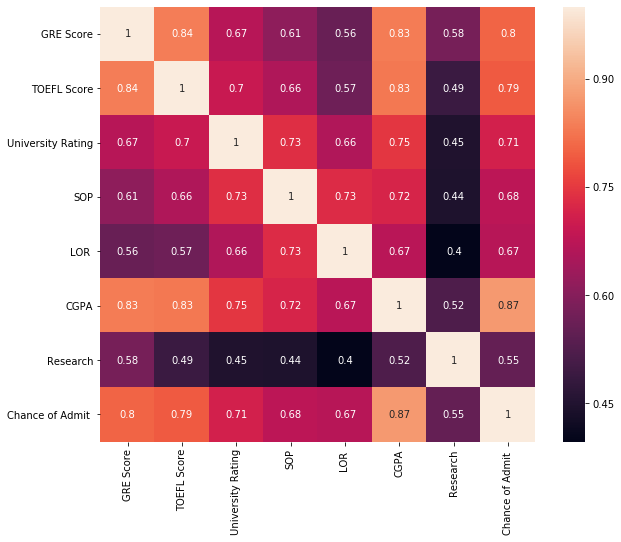

In [7]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(data.corr(),square=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 3.4 查看因变量是否符合正态分布

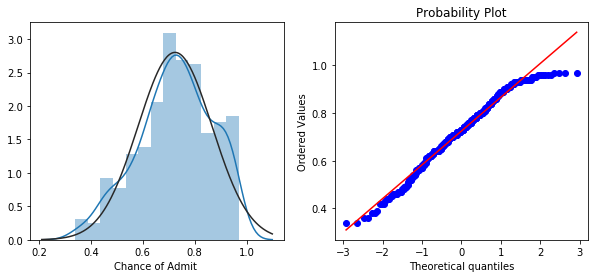

In [8]:
from scipy.stats import norm

figure = plt.figure(figsize=(10,4))

figure.add_subplot(1,2,1)
sns.distplot(data['Chance of Admit '], fit=norm)

figure.add_subplot(1,2,2)
stats.probplot(data['Chance of Admit '],plot=plt)
plt.show()

## 四、模型训练

#### 划分特征和标签

In [9]:
feature = data.iloc[:,:-1] 
label = data['Chance of Admit ']

#### 切分训练集和测试集

In [10]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature,label,test_size=0.2,random_state=0)

#### 模型训练

In [11]:
model = LinearRegression() 
model.fit(Xtrain, Ytrain) 
y_predict = model.predict(Xtest)

#### 误差分析

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
# 均方误差
mean_squared_error(y_predict,Ytest)

0.00480515656978521

In [14]:
# R2
r2_score(y_predict,Ytest)

0.6537876123347572

#### 交叉验证

In [15]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cross_val_score(model,feature,label,cv=10,scoring='r2').mean()

0.7703825020879946

## 五、优化思路

### 5.1 特征标准化

In [16]:
from sklearn import preprocessing

standscaler = preprocessing.StandardScaler()
StandarFeature = pd.DataFrame(standscaler.fit_transform(feature))
StandarFeature.columns = feature.columns

In [17]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(StandarFeature,label,test_size=0.2,random_state=0)

In [18]:
model = LinearRegression(normalize=True)
model.fit(Xtrain, Ytrain)
y_predict = model.predict(Xtest)

In [19]:
mean_squared_error(y_predict,Ytest)

0.004805156569785208

In [20]:
r2_score(y_predict,Ytest)

0.6537876123347564

### 5.2 岭回归

In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature,label,test_size=0.2,random_state=0)
reg = Ridge(alpha=0).fit(Xtrain,Ytrain)
y_predict = reg.predict(Xtest)

In [22]:
reg.score(Xtest,Ytest)

0.7355078738145217

In [23]:
mean_squared_error(y_predict,Ytest)

0.004805156569785208

In [24]:
r2_score(y_predict,Ytest)

0.6537876123347568